# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Implementing Thompson Sampling

In [4]:
N = 10000
d = 10
ads_selected = []

# the number of times the ad i got reward 1 up to round n. n is in N.
numbers_of_rewards_1 = [0] * d
# the number of times the ad i got reward 0 up to round n. n is in N.
numbers_of_rewards_0 = [0] * d

total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    
    # posterior distribution p(theta_i | y), ad i get rewards y. p(theta_i) ~ Bernoulli B(theta_i)
    # p(theta_i | y) ~ Beta( number of successes + 1, number of failures + 1)
    
    # theta_i is unknown, but we set its uncertainty by assuming it has a uniform
    # distribution bernoulli p(theta_i) ~ uniform u([0, 1]), which is prior distribution.
    
    # for each round n, we take a random draw theta_i(n) from the posterior distribution p(theta_i | y),
    # for each ad i.
    # at each round n we select the ad i that has the highest theta_i(n)
    
    for i in range(0, d):
        # for each ad i, we take a random draw from the Beta distribution below.
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i
            
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## Visualising the results - Histogram

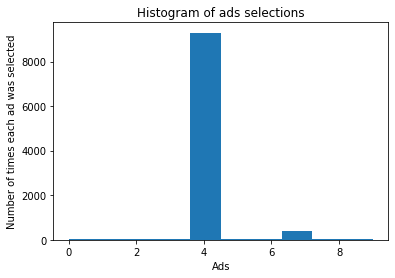

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()